## THE SPARKS FOUNDATION | GRIP |  DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

## Task 2 : Prediction Using Unsupervised ML 
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
Iris Dataset: https://bit.ly/3kXTdox
## By : Prithvi Chandra

    

## Unsupervised ML using K-means Clustering
 ##### Clustering:
 As a part of the unsupervised learning method, clustering attempts to identify a relationship between n-observations( data points) without being trained by the response variable.
##### K-means algorithm: 
 The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.
##### The Elbow Method:
This is probably the most well-known method for determining the optimal number of clusters.
 It calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

### Importing the libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Loading the dataset

In [43]:
#Loading the iris dataset
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)


### Dataset features

In [44]:
#The shape of the dataset(rows,column)
df.shape

(150, 4)

In [45]:
#First 5 row entries of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding the optimal number of clusters for K-Means and determining the value of K



In [46]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wss =[] 
X=df.iloc[:,0:4].values
for i in range(1, 11): 
    KM = KMeans(n_clusters = i,init = 'k-means++',max_iter = 500, n_init=10 ,random_state=0) 
    KM.fit(X) 
      
    wss.append(KM.inertia_)
    


### Plotting the results onto a line graph, to observe 'The elbow'

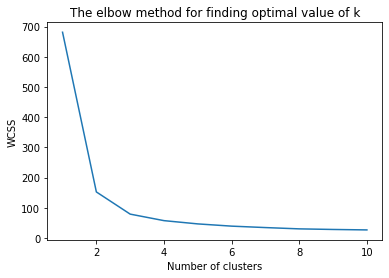

In [47]:
#Determining optimal k with the help of a line graph
plt.plot(range(1, 11), wss)
plt.title('The elbow method for finding optimal value of k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The optimal clusters are formed where the elbow occurs. This is when the WCSS(Within Cluster Sum of Squares) doesn't decrease with every iteration significantly.
Hence from this graph we choose the number of clusters for this model as '3'.

### Creating K-Means Classifier

In [48]:
#Applying kmeans to the dataset & Creating the kmeans classifier
KM = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 500, n_init=10 ,random_state=0) 
y_KM=KM.fit_predict(X)

### Visualizing the centroids of the clusters

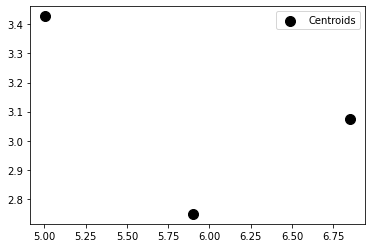

In [49]:
# Plotting the centroids of the clusters
plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

### Visualising the clusters - On the first two columns

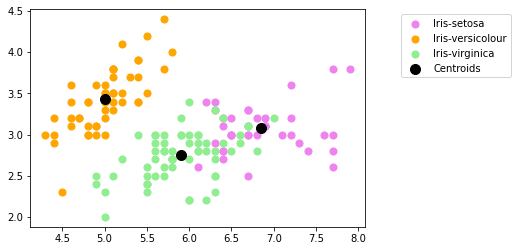

In [50]:
#Visualising the clusters 
plt.scatter(X[y_KM == 0, 0], X[y_KM == 0, 1], 
            s = 50, c = 'violet', label = 'Iris-setosa')
plt.scatter(X[y_KM == 1, 0], X[y_KM == 1, 1], 
            s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_KM == 2, 0], X[y_KM == 2, 1],
            s = 50, c = 'lightgreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend(loc="best",bbox_to_anchor=(0.5, 0.5,0.95,0.5))

### END